In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Indian_Population.csv")

In [3]:
df

,Sl No,State/UT,Population[50],Percent (%),Male,Female,Difference between male and female,Sex ratio,Rural[51],Urban[51],Area[52] (km2),Density (per km2)
0,1,Uttar Pradesh,199812341,16.50,104480510,95331831,9148679,930,155111022,44470455,240928,828
1,2,Maharashtra,112374333,9.28,58243056,54131277,4111779,929,61545441,50827531,307713,365
2,3,Bihar,104099452,8.60,54278157,49821295,4456862,918,92075028,11729609,94163,1102
3,4,West Bengal,91276115,7.54,46809027,44467088,2341939,950,62213676,29134060,88752,1030
4,5,Madhya Pradesh,72626809,6.00,37612306,35014503,2597803,931,52537899,20059666,308245,236
5,6,Tamil Nadu,72147030,5.96,36137975,36009055,128920,996,37189229,34949729,130058,555
6,7,Rajasthan,68548437,5.66,35550997,32997440,2553557,928,51540236,17080776,342239,201
7,8,Karnataka,61095297,5.05,30966657,30128640,838017,973,37552529,23578175,191791,319
8,9,Gujarat,60439692,4.99,31491260,28948432,2542828,919,34670817,25712811,196024,308
9,10,Andhra Pradesh,49386799,4.08,24738068,24648731,89337,996,34776389,14610410,160205,308


In [5]:
df = df[df['State/UT'] != 'Total (India)']

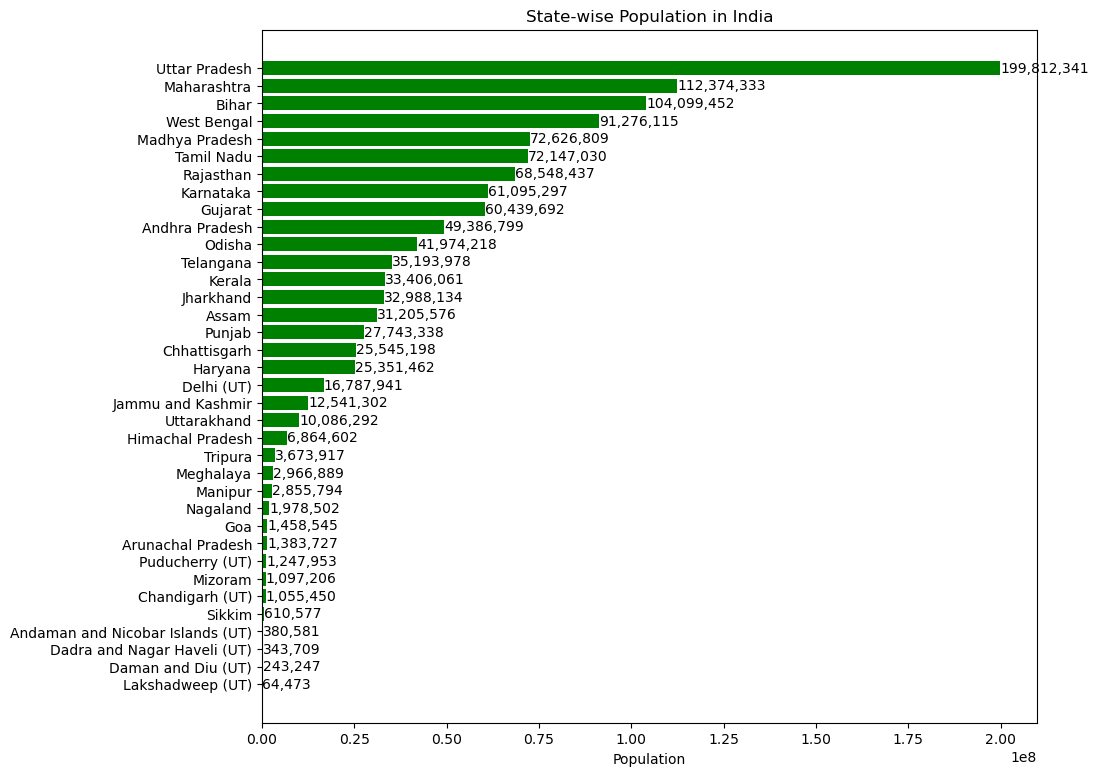

In [33]:
plt.figure(figsize=(10, 9))
bars = plt.barh(df['State/UT'], df['Population[50]'], color='green')


for bar in bars:
    yval = bar.get_y() + bar.get_height() / 2
    xval = bar.get_width()
    plt.text(xval, yval, f'{xval:,.0f}', ha='left', va='center')

plt.xlabel('Population')
plt.title('State-wise Population in India')
plt.gca().invert_yaxis() 
plt.show()


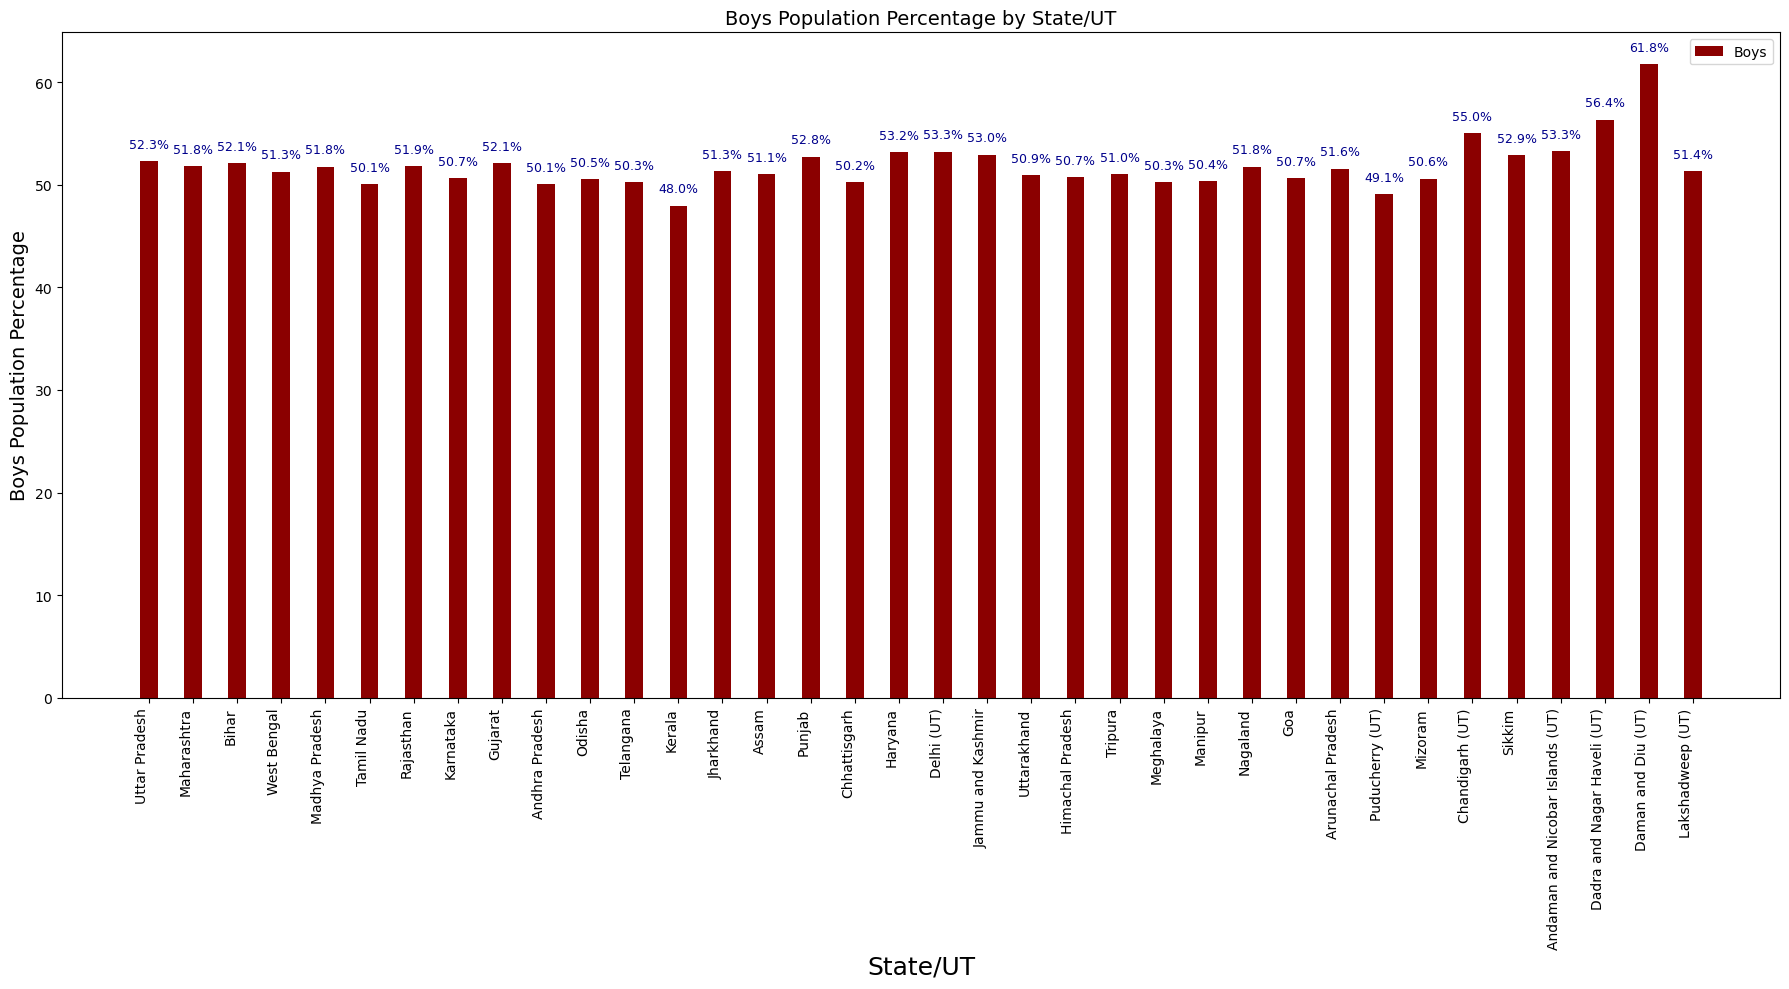

In [55]:
df.loc[:, 'Total Population'] = df['Male'] + df['Female']


plt.figure(figsize=(18, 10))
bar_width = 0.4
bar_positions = range(len(df))

boys_percentage = (df['Male'] / df['Total Population']) * 100

boys_bars = plt.bar(bar_positions, boys_percentage, width=bar_width, label='Boys', color='darkred')


for boys_bar in boys_bars:
    boys_percentage_value = boys_bar.get_height()
    plt.text(boys_bar.get_x() + boys_bar.get_width() / 2, boys_percentage_value + 1, f'{boys_percentage_value:.1f}%',
             ha='center', va='bottom', color='darkblue', fontsize=9)

# Add data labels and ticks
plt.xlabel('State/UT', fontsize=18)
plt.ylabel('Boys Population Percentage', fontsize=14)
plt.title('Boys Population Percentage by State/UT', fontsize=14)
plt.xticks(bar_positions, df['State/UT'], rotation=90, ha='right', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()


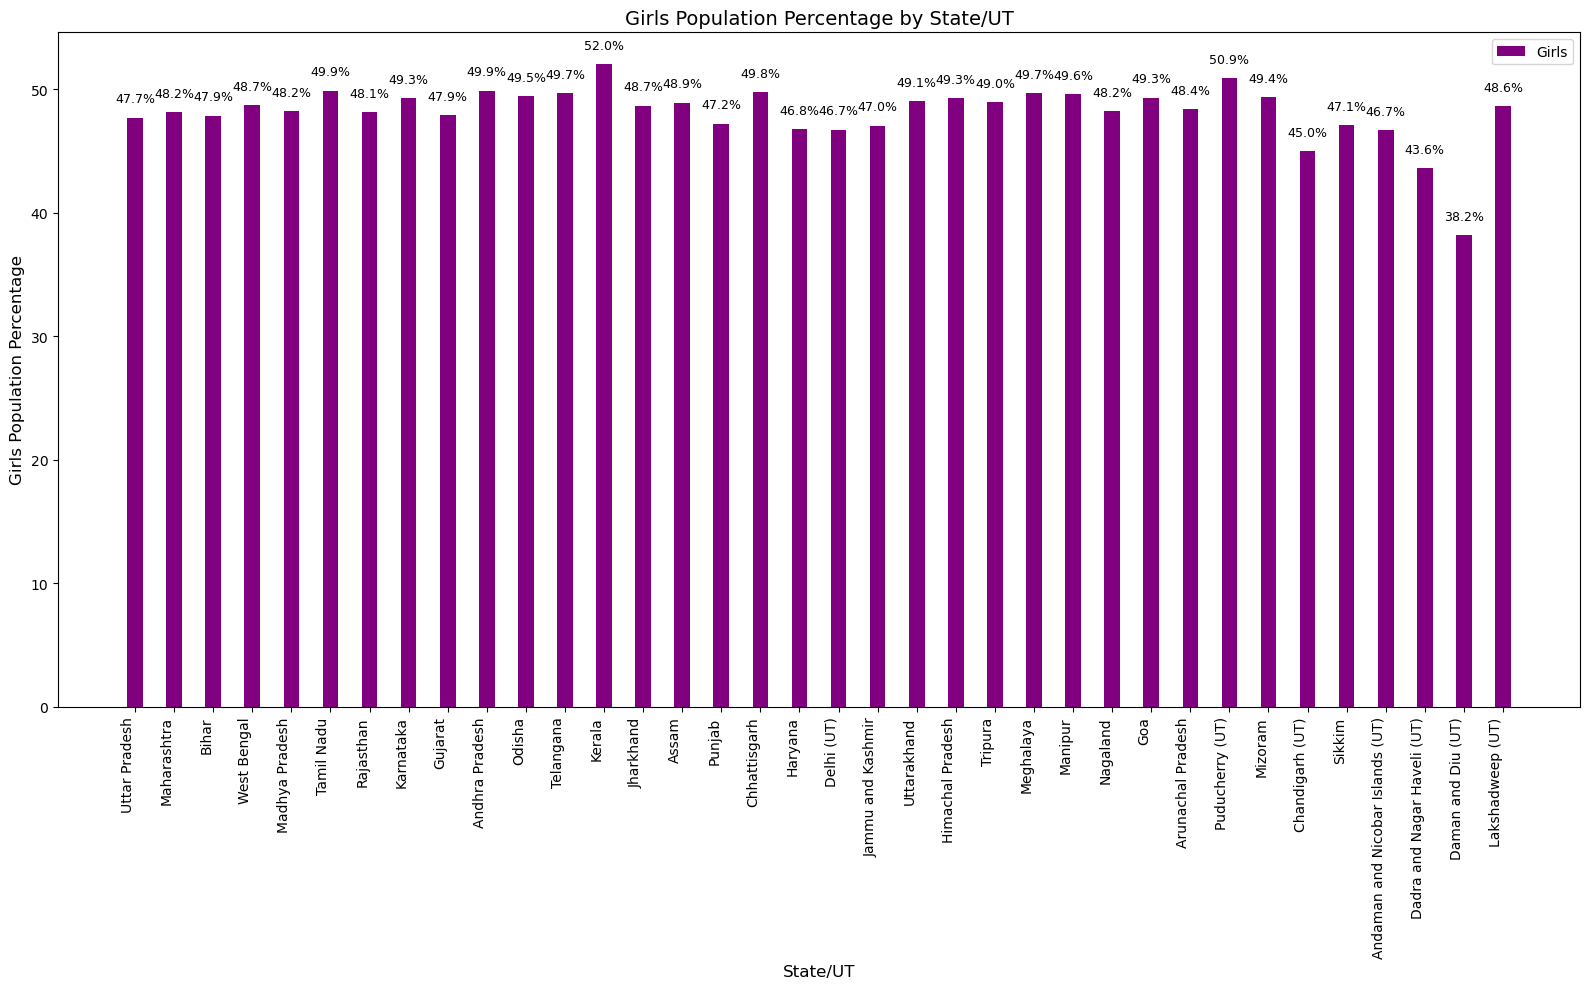

In [56]:

plt.figure(figsize=(16, 10))
bar_width = 0.4
bar_positions = range(len(df))

girls_percentage = (df['Female'] / df['Total Population']) * 100

girls_bars = plt.bar(bar_positions, girls_percentage, width=bar_width, label='Girls', color='purple')


for girls_bar in girls_bars:
    girls_percentage_value = girls_bar.get_height()
    plt.text(girls_bar.get_x() + girls_bar.get_width() / 2, girls_percentage_value + 1, f'{girls_percentage_value:.1f}%',
             ha='center', va='bottom', color='black', fontsize=9)


plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Girls Population Percentage', fontsize=12)
plt.title('Girls Population Percentage by State/UT', fontsize=14)
plt.xticks(bar_positions, df['State/UT'], rotation=90, ha='right', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

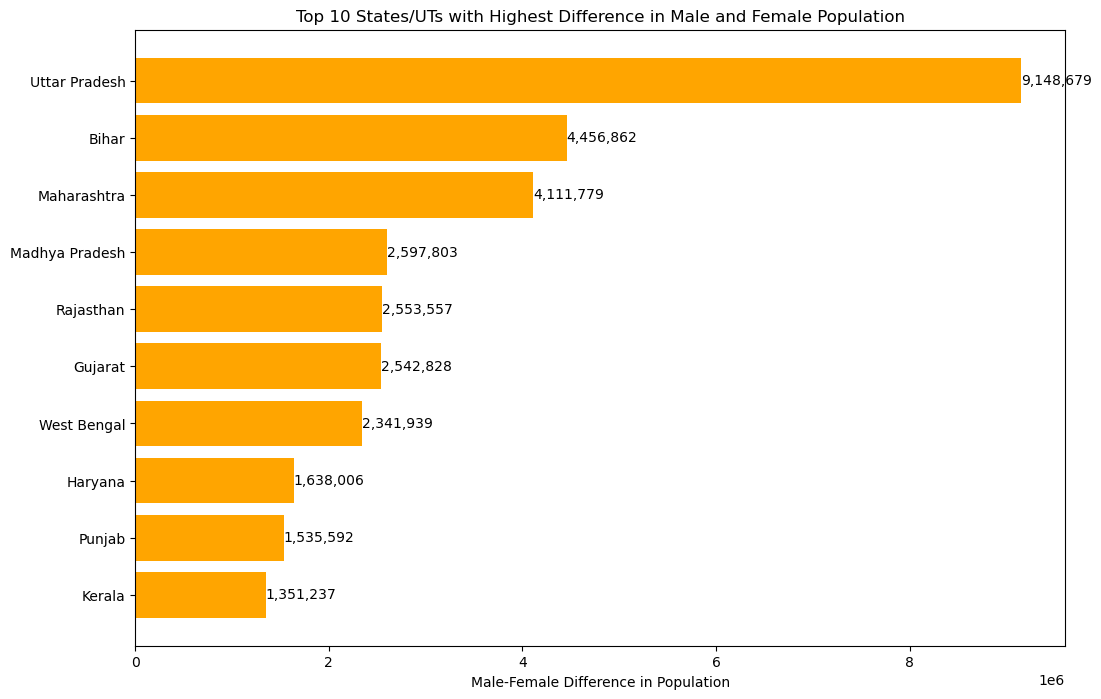

In [65]:
df.loc[:, 'Male-Female Difference'] = abs(df['Male'] - df['Female'])



sorted_data = df.sort_values(by='Male-Female Difference', ascending=False).head(10)


plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_data['State/UT'], sorted_data['Male-Female Difference'], color='orange')


for bar in bars:
    yval = bar.get_y() + bar.get_height() / 2
    xval = bar.get_width()
    plt.text(xval, yval, f'{xval:,.0f}', ha='left', va='center')

plt.xlabel('Male-Female Difference in Population')
plt.title('Top 10 States/UTs with Highest Difference in Male and Female Population')
plt.gca().invert_yaxis() 
plt.show()

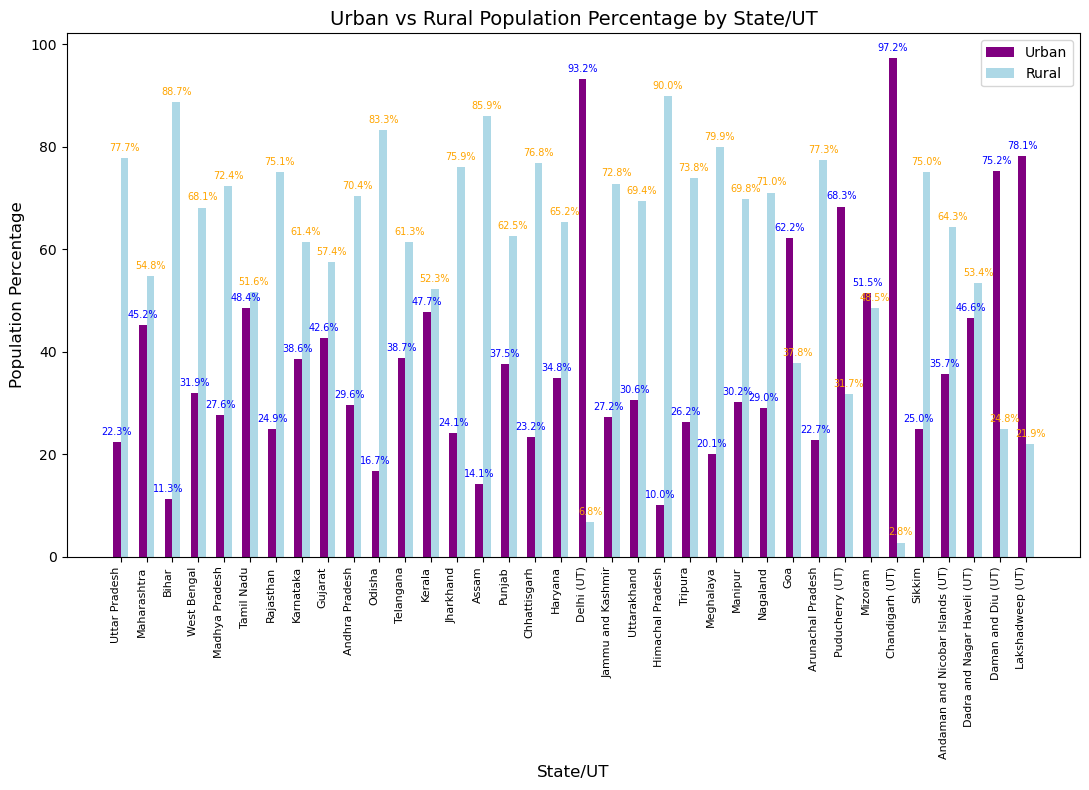

In [83]:
df.loc[:, 'Total Population'] = df['Urban[51]'] + df['Rural[51]']


# Create a bar chart for urban and rural populations side by side for each state
plt.figure(figsize=(11, 8))
bar_width = 0.3
bar_positions = range(len(df))

urban_percentage = (df['Urban[51]'] / df['Total Population']) * 100
rural_percentage = (df['Rural[51]'] / df['Total Population']) * 100

urban_bars = plt.bar(bar_positions, urban_percentage, width=bar_width, label='Urban', color='purple')
rural_bars = plt.bar([pos + bar_width for pos in bar_positions], rural_percentage, width=bar_width, label='Rural', color='lightblue')

# Add percentage values above each bar
for urban_bar, rural_bar in zip(urban_bars, rural_bars):
    urban_percentage_value = urban_bar.get_height()
    rural_percentage_value = rural_bar.get_height()
    
    plt.text(urban_bar.get_x() + urban_bar.get_width() / 2, urban_percentage_value + 1, f'{urban_percentage_value:.1f}%',
             ha='center', va='bottom', color='blue', fontsize=7)
    
    plt.text(rural_bar.get_x() + rural_bar.get_width() / 2, rural_percentage_value + 1, f'{rural_percentage_value:.1f}%',
             ha='center', va='bottom', color='orange', fontsize=7)

# Add data labels and ticks
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Population Percentage', fontsize=12)
plt.title('Urban vs Rural Population Percentage by State/UT', fontsize=14)
plt.xticks([pos + bar_width / 2 for pos in bar_positions], df['State/UT'], rotation=90, ha='right', fontsize=8)
plt.legend()

plt.tight_layout()
plt.show()